# K Means Clustering with Python

This notebook is just a code reference for the video lecture and reading.

## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Import Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Create some Data

In [2]:
from sklearn.datasets import make_blobs
# Hàm make_blobs được sử dụng để tạo ra tập dữ liệu mẫu với cấu trúc phân phối các nhóm dữ liệu có dạng cụm (clusters).

In [5]:
# Create Data
data = make_blobs(n_samples=200, n_features=2,centers=4, cluster_std=1.8,random_state=101)
# n_samples: Số lượng điểm dữ liệu sẽ được tạo ra
# n_features: Số lượng thuộc tính (features) của mỗi điểm dữ liệu
# centers: Số lượng cụm (clusters) dữ liệu mà muốn tạo ra
# random_state: Điều này dùng để cố định kết quả khi tạo dữ liệu mẫu, để đảm bảo kết quả có thể tái sản xuất được.
# cluster_std: Độ lệch chuẩn của các cụm. Tham số này kiểm soát độ lệch của các điểm dữ liệu trong mỗi cụm. Giá trị càng cao thì
# độ lệch càng lớn, giúp tạo ra sự phân tán rộng hơn của các điểm dữ liệu trong cùng một cụm. Trong đoạn mã này, độ lệch chuẩn 
# của các cụm được đặt là 1.8."""

In [44]:
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

In [25]:
data[0][:,0]

array([-6.42884095e+00,  5.86867888e+00, -3.76109375e-01,  2.16679181e+00,
        5.09508570e+00, -1.08788882e+01,  2.03405554e+00, -1.71798771e+00,
        1.16911341e+00, -1.35185444e+00, -6.18548214e+00, -1.19856602e+00,
        2.90296863e+00,  2.39250023e+00, -5.27545147e+00, -5.66814687e-01,
        5.97336628e+00, -2.31355268e+00, -1.01344756e+01, -4.54082629e+00,
       -1.04155833e+01,  6.64796693e-01,  2.11460477e+00, -1.11790221e+01,
       -6.63698251e+00, -7.67422005e+00, -7.98668260e+00,  1.27983684e+00,
        3.54480244e+00,  4.03940181e+00, -2.88118898e+00, -9.11009911e+00,
        5.26001172e+00,  2.05859724e+00, -1.71289834e+00, -5.40562319e+00,
       -1.11995123e+01, -1.13753641e+01, -1.17821836e+01,  1.74815503e+00,
       -9.00392334e+00, -2.86564584e+00, -1.42742293e+00, -3.10933432e+00,
        2.71130095e-01,  8.21556561e-01, -4.11495481e+00,  1.55414928e+00,
       -1.16546211e+01, -1.22009637e+00,  3.22017630e+00, -5.40452892e+00,
        6.02795351e+00,  

In [23]:
data[0][:,1]

array([ 10.14111739,   5.20110356,   3.26427943,   9.56300522,
         7.20752718,  -6.1131804 ,   9.76664755,   1.4140114 ,
         8.24556988,   3.13245345,   9.67406555,   2.50408937,
         7.91251003,   5.38173971,   9.63836659,   0.05602628,
         5.87172022,   0.52398009,  -3.43130837,  11.39201739,
        -5.67545836,   0.09423047,   3.55938488,  -9.30976605,
         6.39426436,  -7.26839654,  -9.57113308,   0.35315078,
         7.93535678,   4.88870433,   9.12919391,  -7.6978166 ,
         4.74007434,  -2.44083039,   2.51221197,   7.47228315,
        -2.55276744,  -4.94525091,  -9.50883007,   2.05595679,
        -6.20816203,   7.52934153,   8.33519078,  10.16414643,
         2.58303824,   6.76966806,   8.02621345,   3.27657687,
        -8.0067372 ,   4.90466211,  -0.5949262 ,   7.19997027,
         4.0169624 ,   0.67345201,  -5.61883075,   5.98523639,
         4.462053  ,   1.81203497,   5.29262653,   6.73039191,
        -7.95924003,   7.46139251,  -4.95353352,   8.48

## Visualize Data

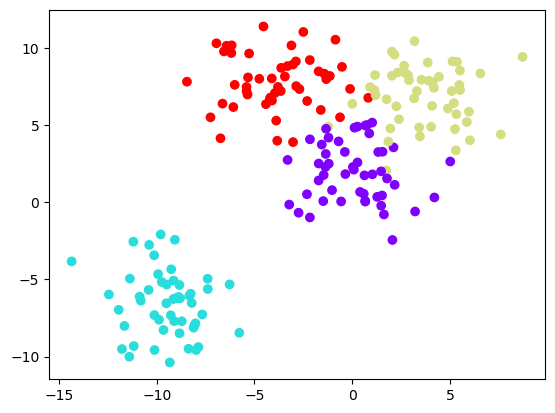

In [6]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

## Creating the Clusters

In [30]:
from sklearn.cluster import KMeans

In [33]:
kmeans = KMeans(n_clusters=4)
# Tạo ra 4 cụm dữ liệu

In [34]:
kmeans.fit(data[0])

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [36]:
kmeans.cluster_centers_

array([[ 3.71749226,  7.01388735],
       [-9.46941837, -6.56081545],
       [-4.13591321,  7.95389851],
       [-0.0123077 ,  2.13407664]])

In [37]:
kmeans.labels_

array([2, 0, 3, 0, 0, 1, 0, 3, 0, 3, 2, 3, 0, 0, 2, 3, 0, 3, 1, 2, 1, 3,
       3, 1, 2, 1, 1, 3, 0, 0, 2, 1, 0, 3, 3, 2, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 0, 2, 3, 1, 3, 3, 2, 0, 3, 1, 2, 3, 3, 2, 0, 1, 0, 1, 2, 0, 3,
       1, 0, 0, 1, 0, 3, 1, 3, 1, 0, 0, 3, 2, 3, 3, 1, 0, 1, 3, 3, 3, 2,
       3, 1, 1, 1, 1, 3, 3, 1, 0, 2, 1, 0, 3, 1, 3, 3, 0, 3, 1, 0, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 0, 2, 3, 1, 2, 2, 2,
       3, 1, 1, 2, 0, 2, 0, 3, 1, 0, 1, 2, 2, 0, 3, 1, 2, 2, 2, 2, 3, 0,
       3, 2, 0, 0, 0, 3, 0, 3, 3, 2, 1, 2, 3, 0, 2, 3, 0, 3, 2, 0, 3, 2,
       0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 0, 0, 2, 1, 3, 0, 0,
       1, 3])

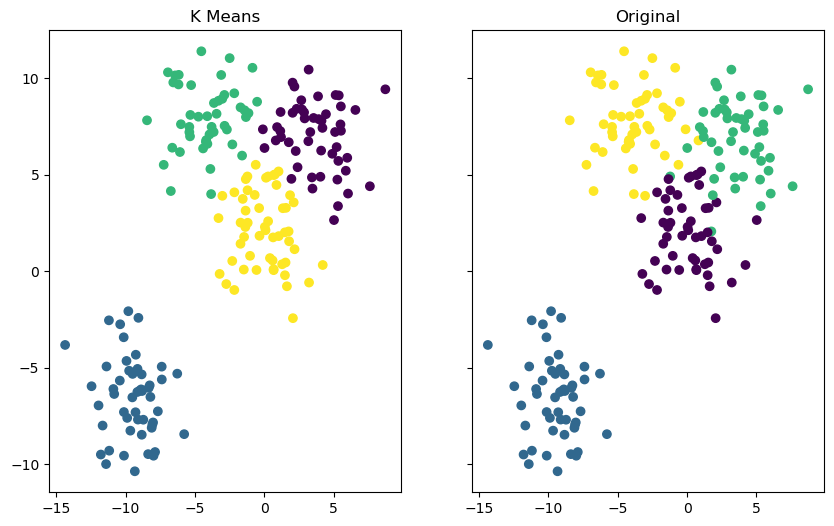

In [40]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='viridis')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='viridis')

You should note, the colors are meaningless in reference between the two plots.

# Great Job!